In [22]:
#initialisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
%matplotlib inline

In [24]:
# Importing the dataset  
df = pd.read_csv('Mall_Customers_data.csv')  

In [26]:
df['Annual Income (k$)'].max()

137

In [27]:
df['Spending Score (1-100)'].max()

99

In [14]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
x = df.iloc[:, [3, 4]].values  

In [16]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

C:\Users\Kawsikan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


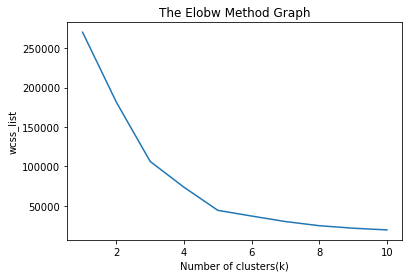

In [17]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [6]:
# #dataset panda dataframe
# df = pd.DataFrame({
#     'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
#     'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24],
# })

In [28]:
# define random seed as 200
np.random.seed(200)
# number of clusters we want
k = 5
# centroids[i] = [x, y] choose first centroid
centroids = {
    # select random number from 0 to 80
    i+1: [np.random.randint(0, 138), np.random.randint(0, 100)]
    for i in range(k)
}

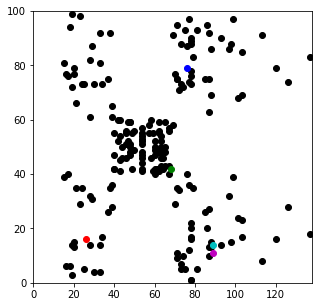

In [30]:
fig = plt.figure(figsize=(5,5))
# creating scatter plot and passing x and y arrays into dataframe
                              # colors also 3
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b',4: 'c',5:'m'}

for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0, 138)
plt.ylim(0, 100)
plt.show()

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   distance_form_1  distance_form_2  distance_form_3  distance_form_4  \
0        25.495098        53.084838        72.945185        78.108898   
1        65.924199        65.802736        61.032778        99.824847   
2        14.142136        63.245553        94.493386        73.437048   
3        61.814238        62.681736        60.033324        96.426138   
4        25.632011        51.039201        70.724819        76.550637   

   distance_form_5  closest color  
0        79.120162        1     r  
1       101.862653        3     b  
2       

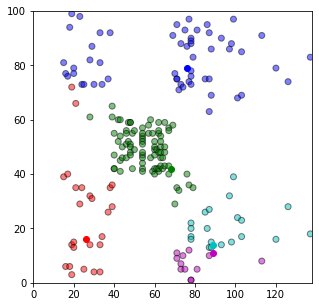

In [32]:
# assign stage assign each value to cluster
def assignment(df, centroids):
  for i in centroids.keys():
    # sqrt((x1-x2)^2 - (y1-y2)^2)
    df['distance_form_{}'.format(i)] = (
        np.sqrt(
            (df['Annual Income (k$)'] - centroids[i][0]) ** 2 + (df['Spending Score (1-100)'] - centroids[i][1]) ** 2
        )
    )

  centroid_distance_cols = ['distance_form_{}'.format(i) for i in centroids.keys()]
  df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
  df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_form_')))
  df['color'] = df['closest'].map(lambda x: colmap[x])
  return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 138)
plt.ylim(0, 100)
plt.show()

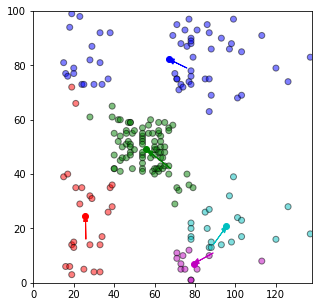

In [33]:
# centroids are updates
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
  for i in centroids.keys():
    centroids[i][0] = np.mean(df[df['closest'] == i]['Annual Income (k$)'])
    centroids[i][1] = np.mean(df[df['closest'] == i]['Spending Score (1-100)'])
  return k

centroids = update(centroids)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color=df['color'], alpha=0.5, edgecolor='k')

for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0, 138)
plt.ylim(0, 100)

for i in old_centroids.keys():
  old_x = old_centroids[i][0]
  old_y = old_centroids[i][1]
  dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
  dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
  ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])

plt.show()

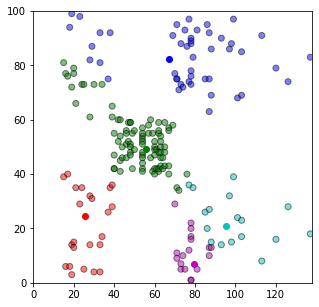

In [34]:
# repeat assignment stage
df = assignment(df, centroids)

# plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 138)
plt.ylim(0, 100)
plt.show()

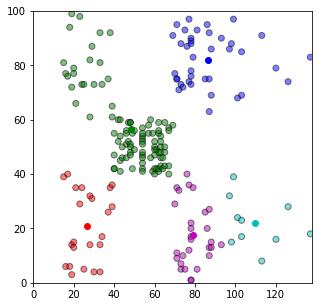

In [35]:
# continue untill all assigned categories don't change any more
while True:
  closest_centroids = df['closest'].copy(deep=True)
  centroids = update(centroids)
  df = assignment(df, centroids)
  if closest_centroids.equals(df['closest']):
    break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 138)
plt.ylim(0, 100)
plt.show()

In [12]:
# df = pd.DataFrame({
#     'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
#     'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24],
# })

# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=3)
# # store values of x and y cordinates variables
# kmeans.fit(df)

In [40]:
# # Importing the dataset  
# df = pd.read_csv('Mall_Customers_data.csv')  
# df.drop(['CustomerID'], axis = 1)
# df.drop(['Genre'], axis = 1)
# df.drop(['Age'], axis = 1)


,CustomerID,Genre,Annual Income (k$),Spending Score (1-100)
0,1,Male,15,39
1,2,Male,15,81
2,3,Female,16,6
3,4,Female,16,77
4,5,Female,17,40
...,...,...,...,...
195,196,Female,120,79
196,197,Female,126,28
197,198,Male,126,74
198,199,Male,137,18


In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
# store values of x and y cordinates variables
kmeans.fit(x)

KMeans(n_clusters=5)

In [43]:
labels = kmeans.predict(x)
centroids = kmeans.cluster_centers_

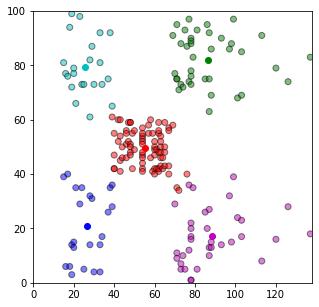

In [45]:
fig = plt.figure(figsize=(5,5))

colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)

# creating scatter plot and passing x and y arrays into dataframe
                              # colors also 3
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color=colors1, alpha=0.5, edgecolor='k')


for idx, centroid in enumerate(centroids):
  plt.scatter(*centroid, color=colmap[idx+1])

# for i in centroids.keys():
#   plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0, 138)
plt.ylim(0, 100)
plt.show()